In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.mixture import DPGMM
from sklearn.mixture import VBGMM

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict


from sklearn import svm
import matplotlib.mlab as mlab

In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])




In [3]:
np.random.seed(0)

In [4]:
X_train_load = pd.read_csv('./data/task1_3_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_3_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_3_test_X.csv',header=None, sep=' ').as_matrix()

In [5]:
pd.DataFrame(X_train_load[np.where(y_train_load ==0)]).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,120.108483,350.015814,12.043978,337.570164,132.807783,-0.002443,-29.810542,1.044580,19.930181,-35.246730,-41.913453,179.709856,163.591772,-7.245503,49.887606,260.012863,-123.350106,-13.424983,855.135555,-22.088617
std,4814.723278,7405.676185,2668.688926,3092.583581,6590.844003,0.009044,1380.356264,142.106965,1359.541491,286.221403,7948.079965,3779.276450,5062.473335,247.873805,9429.772296,4221.131672,5772.321606,7750.178084,7039.656147,6970.622481
min,-13387.794695,-21442.966148,-7584.993831,-9635.569115,-18524.251418,-0.028311,-3816.264822,-419.255912,-4352.277504,-1054.655009,-24594.091027,-10903.731898,-15409.041872,-696.498689,-35904.855866,-14031.404481,-16017.637292,-26274.263844,-18863.577887,-21825.346030
25%,-3107.490996,-4217.622678,-1804.797605,-1630.643371,-4464.804805,-0.008610,-1053.877265,-93.518161,-863.276494,-220.458721,-5675.487826,-2359.942753,-3110.274944,-187.253970,-6370.328148,-2226.014045,-4107.520090,-5197.737479,-4050.995695,-4800.561586
50%,86.482160,252.581664,141.857669,325.464919,-114.058435,-0.002631,-18.703088,3.960422,51.248370,-27.779104,-639.767128,291.883680,277.832845,-3.161851,-171.208716,253.678014,-228.169567,-164.925603,936.086709,-181.856531
75%,3403.303797,4996.847787,1668.281712,2322.834848,4493.213135,0.003823,906.933596,95.918590,909.178733,155.301221,6054.848896,2859.854688,3635.753656,168.176188,6813.324929,3090.852244,3507.097639,5057.154005,5690.416607,4673.049377
max,13661.299103,25978.892623,8710.231713,11840.859744,18097.677958,0.026120,4223.898243,362.056978,3193.806665,700.672713,23041.690788,9988.629064,17038.493782,729.129362,25809.623601,15671.446197,19853.896429,25721.907506,24985.252769,23075.539254


In [6]:
pd.DataFrame(X_train_load[np.where(y_train_load ==1)]).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,211.525957,222.925102,146.922201,-3.621843,-234.831818,0.003461,1.867975,-5.189873,57.413043,9.291278,-45.465946,6.481024,-317.032033,7.054758,284.331684,45.679078,-469.735379,378.050700,17.022047,177.420828
std,4490.340466,6850.243248,2627.068464,3150.006870,6617.290511,0.009334,1361.374473,149.915593,1377.521071,285.452922,8135.262713,3663.310939,4832.571863,247.360325,9472.821584,4287.933129,5818.531184,8137.444645,6938.976643,6845.205132
min,-13284.822382,-23551.723365,-7838.265872,-10473.748382,-16876.681253,-0.022111,-4560.144143,-503.595654,-4134.533065,-1254.955064,-27094.907930,-13184.733314,-17991.934664,-835.468248,-27843.060836,-13242.935439,-18927.138311,-22571.578281,-21691.379542,-21471.331535
25%,-2761.014071,-4033.815449,-1607.335761,-2033.054595,-4580.302279,-0.002593,-966.110171,-103.271060,-862.417472,-171.535148,-5090.247008,-2382.948402,-3278.006418,-146.392469,-5843.586160,-2726.681737,-3895.269652,-4836.055707,-4943.499534,-4373.659206
50%,274.049957,243.682074,83.154267,-112.405778,-847.232527,0.003448,47.921736,-3.115556,65.630046,14.228036,270.975919,-51.578505,-525.925689,16.379000,464.888215,-79.769541,-532.179140,208.194875,-50.885105,290.336210
75%,3137.018724,4628.731828,1974.933878,2109.733568,4331.689115,0.009551,1023.184047,88.474949,973.994784,193.980979,5211.534986,2365.720575,3004.107360,144.602453,6592.739499,2835.449879,3407.053243,5851.500066,4647.080221,4825.641962
max,14006.130559,18047.302154,9831.928335,9767.859336,20123.999175,0.029498,4035.544442,479.895471,4494.143073,839.277973,22770.341957,11534.672102,12399.558454,860.937963,27530.978710,11222.341514,20316.477679,20098.477751,21541.867043,20533.371193


In [7]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 20)
(1000,)
(1000, 20)


In [8]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
#skb = SelectKBest(chi2, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function mutual_info_classif at 0x114cc4b70>)

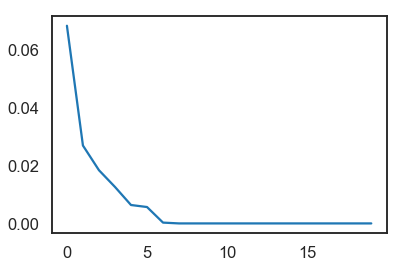

In [9]:
plt.plot(np.sort(skb.scores_)[::-1])

In [10]:
print(np.sort(skb.scores_)[::-1])

[ 0.06820197  0.02687286  0.01835629  0.01258641  0.00635203  0.00565365
  0.00027743  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]


In [11]:
skb.k = 3

In [12]:
# X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
X = skb.transform(np.vstack([X_train_load, X_test_load]))
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)



In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 3)
(1000,)
(1000, 3)


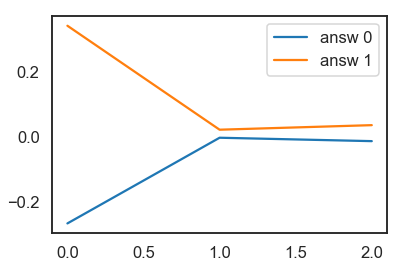

In [14]:
plt.plot(np.mean(X_train[np.where(y_train==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train[np.where(y_train==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')

plt.savefig('Practise_3_FeatureMean.pdf')

In [15]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))


-5070 -1000


In [16]:
X_train_new = np.array(X_train)
y_train_new = np.array(y_train)

X_test_new = np.array(X_test)

In [17]:
rho = 0.5
Predict = cross_val_predict(estimator=LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))

Predict_For_AUC = LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.633
AUC 0.673399986397
NUM 367
ASY1 -1283
ASY2 -86


In [18]:
rho = 0.9
Predict = cross_val_predict(estimator=LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))


Predict_For_ASY1 = LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.507
AUC 0.672919892299
NUM 493
ASY1 -4577
ASY2 -14


In [19]:
rho = 0.6666666
Predict = cross_val_predict(estimator=LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))

Predict_For_ASY2 = LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.575
AUC 0.673331973067
NUM 425
ASY1 -3904
ASY2 -111


In [20]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_3_answ.csv', sep = ',')
